[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

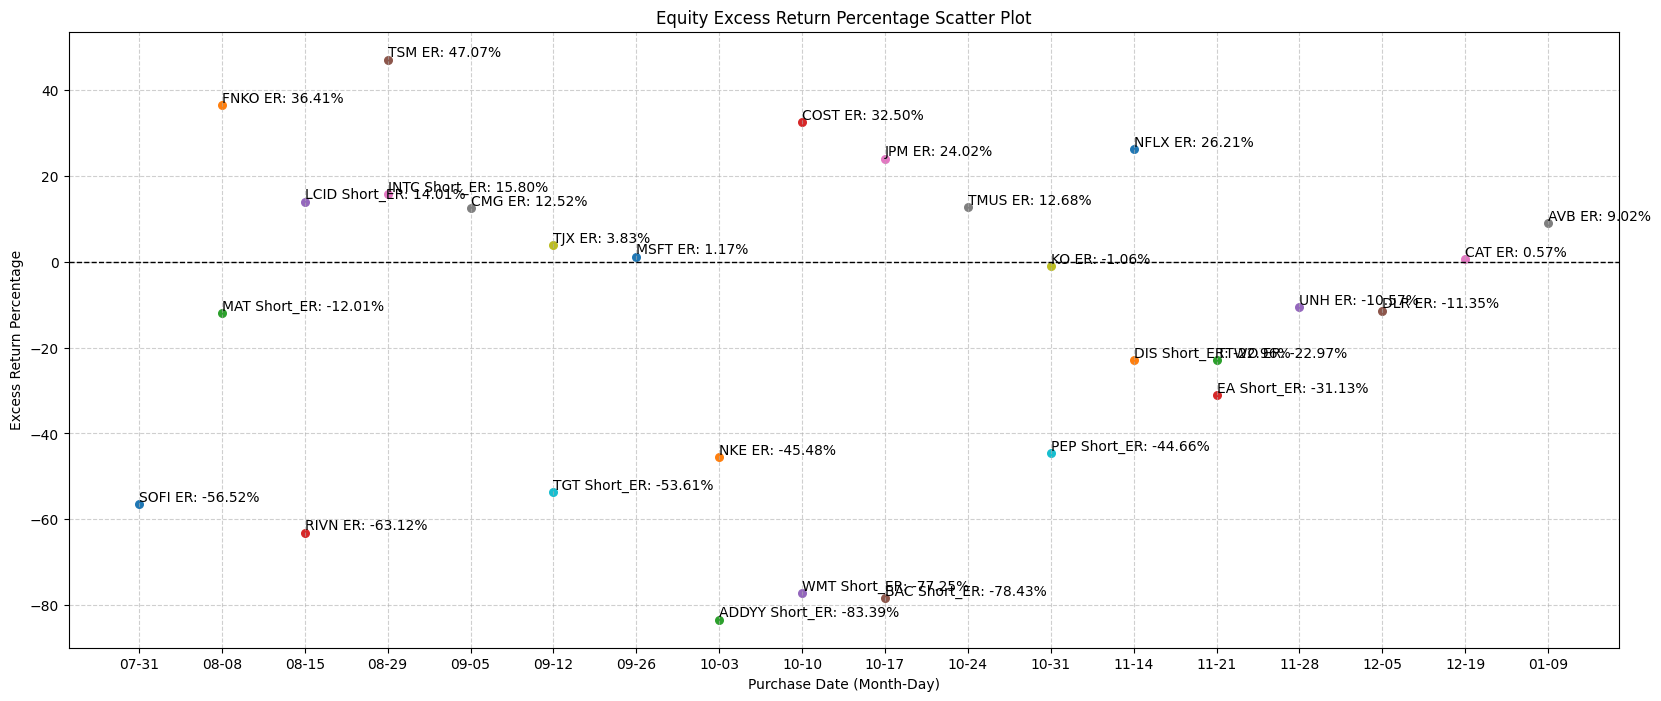

Mean Er = -13.52%
Std Er = 36.45%


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

def calculate_return_percentage(symbol, purchase_date, benchmark_symbol='SPY', pos='Long'):

    equity_data = yf.download(symbol, start=purchase_date, end=datetime.today().strftime('%Y-%m-%d'))


    benchmark_data = yf.download(benchmark_symbol, start=purchase_date, end=datetime.today().strftime('%Y-%m-%d'))


    equity_data['Daily Return'] = equity_data['Adj Close'].pct_change()
    benchmark_data['Daily Return'] = benchmark_data['Adj Close'].pct_change()


    equity_data['Cumulative Return'] = (1 + equity_data['Daily Return']).cumprod()
    benchmark_data['Cumulative Return'] = (1 + benchmark_data['Daily Return']).cumprod()

    equity_return_percentage = (equity_data['Cumulative Return'].iloc[-1] - 1) * 100
    benchmark_return_percentage = (benchmark_data['Cumulative Return'].iloc[-1] - 1) * 100


    excess_return = (-1 * equity_return_percentage) - benchmark_return_percentage if pos == 'Short' else equity_return_percentage - benchmark_return_percentage


    return equity_return_percentage, benchmark_return_percentage, excess_return

def plot_scatter(equities, benchmark_symbol='SPY'):
    plt.figure(figsize=(20, 8))
    stats =[]

    for equity in equities:
        symbol = equity['symbol']
        purchase_date = equity['purchase_date']
        pos1 = equity.get('pos', None)

        equity_return, benchmark_return, excess_return = calculate_return_percentage(symbol, purchase_date, benchmark_symbol, pos1)
        stats.append(excess_return)


        month_day = purchase_date[5:]

        if pos1:
          plt.scatter(month_day, excess_return, label=f'{symbol} - ER: {excess_return:.2f}%', s=30)
          plt.text(month_day, excess_return, f'{symbol} Short_ER: {excess_return:.2f}%', fontsize=10, ha='left', va='bottom')
        else:
          plt.scatter(month_day, excess_return, label=f'{symbol} - ER: {excess_return:.2f}%', s=30)
          plt.text(month_day, excess_return, f'{symbol} ER: {excess_return:.2f}%', fontsize=10, ha='left', va='bottom')

    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Purchase Date (Month-Day)')
    plt.ylabel('Excess Return Percentage')
    plt.title('Equity Excess Return Percentage Scatter Plot')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    print(f'Mean Er = {np.mean(stats):.02f}%')
    print(f'Std Er = {np.std(stats):.02f}%')


# Example usage
equities = [
    {'symbol': 'SOFI', 'purchase_date': '2023-07-31'},
    {'symbol': 'FNKO', 'purchase_date': '2023-08-08'},
    {'symbol': 'MAT', 'purchase_date': '2023-08-08', 'pos': 'Short'},
    {'symbol': 'RIVN', 'purchase_date': '2023-08-15'},
    {'symbol': 'LCID', 'purchase_date': '2023-08-15', 'pos': 'Short'},
    {'symbol': 'TSM', 'purchase_date': '2023-08-29'},
    {'symbol': 'INTC', 'purchase_date': '2023-08-29', 'pos': 'Short'},
    {'symbol': 'CMG', 'purchase_date': '2023-09-05'},
    {'symbol': 'TJX', 'purchase_date': '2023-09-12'},
    {'symbol': 'TGT', 'purchase_date': '2023-09-12', 'pos': 'Short'},
    {'symbol': 'MSFT', 'purchase_date': '2023-09-26'},
    {'symbol': 'NKE', 'purchase_date': '2023-10-03'},
    {'symbol': 'ADDYY', 'purchase_date': '2023-10-03', 'pos': 'Short'},
    {'symbol': 'COST', 'purchase_date': '2023-10-10'},
    {'symbol': 'WMT', 'purchase_date': '2023-10-10', 'pos': 'Short'},
    {'symbol': 'BAC', 'purchase_date': '2023-10-17', 'pos': 'Short'},
    {'symbol': 'JPM', 'purchase_date': '2023-10-17'},
    {'symbol': 'TMUS', 'purchase_date': '2023-10-24'},
    {'symbol': 'KO', 'purchase_date': '2023-10-31'},
    {'symbol': 'PEP', 'purchase_date': '2023-10-31', 'pos': 'Short'},
    {'symbol': 'NFLX', 'purchase_date': '2023-11-14'},
    {'symbol': 'DIS', 'purchase_date': '2023-11-14', 'pos': 'Short'},
    {'symbol': 'TTWO', 'purchase_date': '2023-11-21'},
    {'symbol': 'EA', 'purchase_date': '2023-11-21', 'pos': 'Short'},
    {'symbol': 'UNH', 'purchase_date': '2023-11-28'},
    {'symbol': 'DLR', 'purchase_date': '2023-12-05'},
    {'symbol': 'CAT', 'purchase_date': '2023-12-19'},
    {'symbol': 'AVB', 'purchase_date': '2024-01-09'}
]

plot_scatter(equities)
